In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys
import seaborn as sns
from matplotlib.animation import FuncAnimation

sys.path.append('src')
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
# utils
def plot_decision_boundary_2d(estimator,X,y,incr=0.01,t=False):
    if t:
        X = X.transpose()
    x1, x2 = np.meshgrid(
        np.arange(np.min(X[:,0]),np.max(X[:,0]),incr),
        np.arange(np.min(X[:,1]),np.max(X[:,1]),incr)
    )
    x1_r, x2_r = x1.flatten().reshape(-1,1), x2.flatten().reshape(-1,1)
    Xr = np.concatenate([x1_r,x2_r],axis=1)
    if t:
        Xr = Xr.transpose()
    y_grid = estimator.predict(Xr).reshape(x1.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(x1,x2,y_grid,colors=['b','b','r','r'],alpha=0.3,levels=len(np.unique(y)))
    for yc, color in zip(np.unique(y),['b','r']):
        Xc=X[y==yc] 
        plt.scatter(x=Xc[:,0],y=Xc[:,1],c=color,alpha=0.8)
    plt.xlabel('x$_1$')
    plt.ylabel('x$_2$')
    plt.xlim([np.min(X[:,0]),np.max(X[:,0])])
    plt.ylim([np.min(X[:,1]),np.max(X[:,1])])
    plt.grid(True);

### Linear Regression

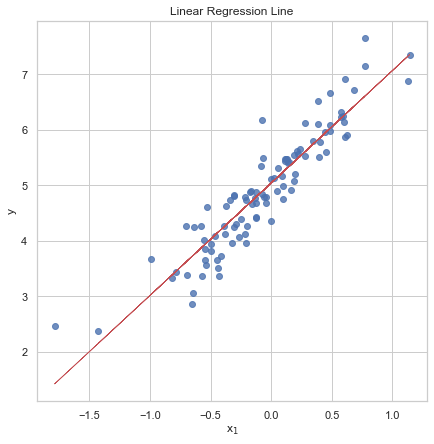

In [3]:
from linear_regression import LinearRegression
from IPython.display import HTML

# generate data
m = 100
n = 1
X = np.random.normal(0,0.5,(m,n))
y = 2*X[:,:] + 5 + np.random.normal(0,0.5,(m,1)) 

# fit linear regression model
lr = LinearRegression()
mse = []
n_epochs = 200
y_data = []
for y_hat, theta in lr.fit(X,y,0.1,n_epochs):
    mse.append(np.sum((y_hat-y.reshape(m,1))**2,axis=0)/(2*m))

# plot linear regression line
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],y,alpha=0.8)
plt.plot(X[:,0],y_hat,color='r',linewidth=0.75)
plt.xlabel("x$_1$")
plt.ylabel("y")
plt.title('Linear Regression Line')
plt.savefig("figures/lineareg")

## Nearest Neighbor

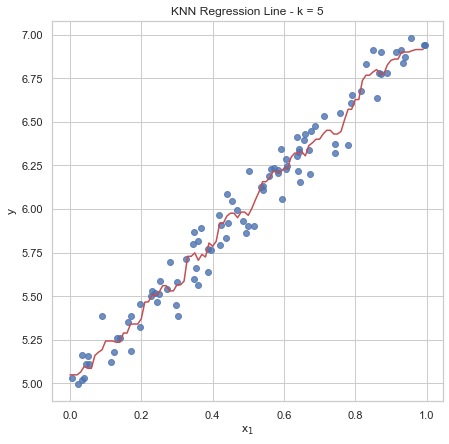

In [10]:
from knn import KNNRegression, KNNClassification

# generate data
m = 100
n = 1
X = np.random.rand(m,n)
y = 2*X[:,0] + 5 + np.random.normal(0,0.1,m)

# fit KNN model
k = 5
knn = KNNRegression(k=k)
knn.fit(X,y)

# plot KNN regression line
X_sweep = np.arange(0,1,0.01).reshape(-1,1)
y_sweep = knn.predict(X_sweep)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],y,alpha=0.8)
plt.plot(X_sweep,y_sweep,color='r')
plt.xlabel("x$_1$")
plt.ylabel("y")
plt.title(f'KNN Regression Line - k = {k}');
plt.savefig("figures/knnreg")

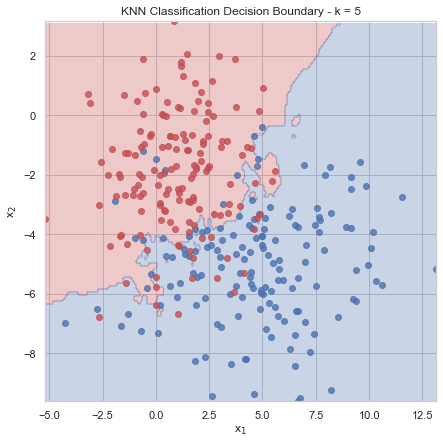

In [44]:
# generate data
m = 300
n = 2
X1 = np.concatenate([np.random.normal(1,2,size=m//2),np.random.normal(4,3,size=m//2)],axis=0)
X2 = -np.concatenate([np.random.normal(2,2,size=m//2),np.random.normal(5,2,size=m//2)],axis=0)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1)],axis=1)
y = np.concatenate([np.ones(m//2),np.zeros(m//2)])

# fit KNN model
k = 5
knn = KNNClassification(k=k)
knn.fit(X,y)

# plot KNN decision boundary
plot_decision_boundary_2d(knn,X,y,0.1)
plt.title(f'KNN Classification Decision Boundary - k = {k}')
plt.savefig("figures/knnclass")

## Logistic Regression

(1351, 364)


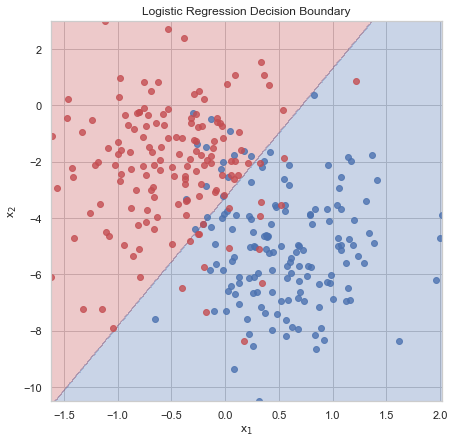

In [35]:
from logistic_regression import LogisticRegression
from utils import sigmoid

# generate data
m = 300
n = 2
X1 = np.concatenate([np.random.normal(-0.5,0.5,size=m//2),np.random.normal(0.5,0.5,size=m//2)],axis=0)
X2 = -np.concatenate([np.random.normal(2,2,size=m//2),np.random.normal(5,2,size=m//2)],axis=0)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1)],axis=1)
y = np.concatenate([np.ones(m//2),np.zeros(m//2)])
# X = np.random.normal(0,0.5,(m,n))
# y = np.zeros(m)
# for i in range(m):
#     y[i] = np.random.binomial(1,sigmoid(3+2*X[i,0]-5*X[i,1]+np.random.normal(0,0.1)))

# fit logisitic regression model
logreg = LogisticRegression()
n_epochs = 200
logreg.fit(X,y,0.1,n_epochs)

# plot logistic regression decision boundary
plot_decision_boundary_2d(logreg,X,y,0.01)
plt.title(f'Logistic Regression Decision Boundary')
plt.savefig("figures/logreg");

## Support Vector Machines

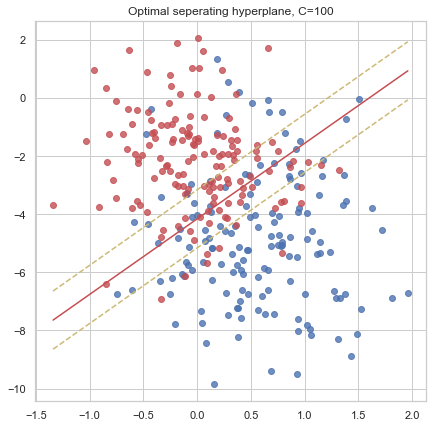

In [48]:
from svm import SVM

# generate data
m = 300
n = 2
X1 = np.concatenate([np.random.normal(0,0.5,size=m//2),np.random.normal(0.5,0.5,size=m//2)],axis=0)
X2 = -np.concatenate([np.random.normal(2,2,size=m//2),np.random.normal(5,2,size=m//2)],axis=0)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1)],axis=1)
y = np.concatenate([np.ones(m//2),np.zeros(m//2)])

# fit SVM model
C = 100
svm = SVM(kernel='linear',C=C)
svm.fit(X,y)

# plot SVM optimal seperating hyperplane
plt.figure(figsize=(7,7))
for yc, color in zip(np.unique(y),['b','r']):
    Xc=X[y==yc] 
    plt.scatter(x=Xc[:,0],y=Xc[:,1],c=color,alpha=0.8)
hyperplane_x1 = np.arange(np.min(X[:,0]),np.max(X[:,0]),0.1)
hyperplane_x2 = -(svm.w[0]*hyperplane_x1+svm.b)/svm.w[1]
plt.plot(hyperplane_x1,hyperplane_x2,color='r')
margin1_x2 = hyperplane_x2 + 1
margin2_x2 = hyperplane_x2 - 1
plt.plot(hyperplane_x1,margin1_x2,'--',color='y',linewidth=1.5)
plt.plot(hyperplane_x1,margin2_x2,'--',color='y',linewidth=1.5)
plt.title(f'Optimal seperating hyperplane, C={C}');

In [53]:
# plot SVM decision boundary
plot_decision_boundary_2d(svm,X,y)
plt.plot(hyperplane_x1,margin1_x2,'--',color='y',linewidth=1.5)
plt.plot(hyperplane_x1,margin2_x2,'--',color='y',linewidth=1.5)
plt.title(f'SVM Decision Boundary - C={C}')
plt.savefig('figures/svm');

KeyboardInterrupt: 

## Principal Components Analysis

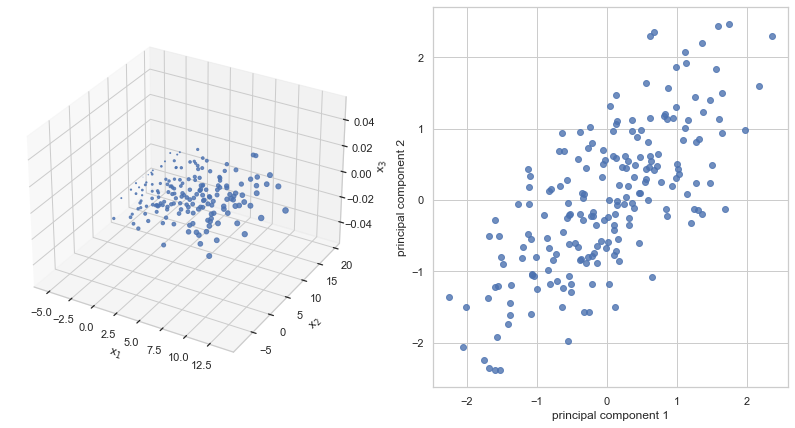

In [52]:
from pca import PCA

# generate data
m = 200
n = 3
X1 = np.random.normal(4,4,size=m)
X2 = np.random.normal(5,5,size=m)
X3 = 2*X1 + 3 + np.random.normal(0,1,size=m)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1),X3.reshape(m,1)],axis=1)

# fit PCA model with 2 components
pca = PCA(k=2)
pca.fit(X)
y = pca.transform(X)

# plot original data
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,2,1,projection='3d')
plt.scatter(X1,X2,X3,alpha=0.8)
ax.set_xlabel("x$_1$")
ax.set_ylabel("x$_2$")
ax.set_zlabel("x$_3$");
# plot PCA transformed data
ax = fig.add_subplot(1,2,2)
plt.scatter(y[:,0],y[:,1],alpha=0.8)
ax.set_xlabel("principal component 1")
ax.set_ylabel("principal component 2");
plt.savefig("figures/pca")

## K-Means Clustering

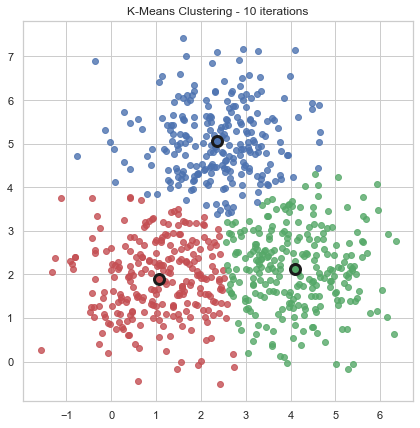

In [64]:
from kmeans import KMeansClustering

# generate data
m = 500
X1 = np.concatenate([np.random.normal(1,1,m//2),np.random.normal(2.5,1,m//2),np.random.normal(4,1,m//2)]).reshape(-1,1)
X2 = np.concatenate([np.random.normal(2,1,m//2),np.random.normal(5,1,m//2),np.random.normal(2,1,m//2)]).reshape(-1,1)
X = np.concatenate([X1,X2],axis=1)

# fit KMeans model
kmeans = KMeansClustering(n_clusters=3)
n_itr = 10
for c, cluster_centroids in kmeans.fit(X,itr=n_itr):
    pass

# plot clusters and cluster centroids
plt.figure(figsize=(7,7))
hue = np.zeros(X.shape[0])
colors = ['r','g','b']
for j in range(len(cluster_centroids)):
    cluster_centroid = cluster_centroids[j]
    plt.plot(cluster_centroid[0],cluster_centroid[1],marker='o',color=colors[j],markersize=10,markeredgewidth=3,markeredgecolor='k')
    Xc=X[c==j]
    plt.scatter(x=Xc[:,0],y=Xc[:,1],color=colors[j],alpha=0.8);
plt.title(f'K-Means Clustering - {n_itr} iterations')
plt.savefig('figures/kmeans')

## Decision Trees

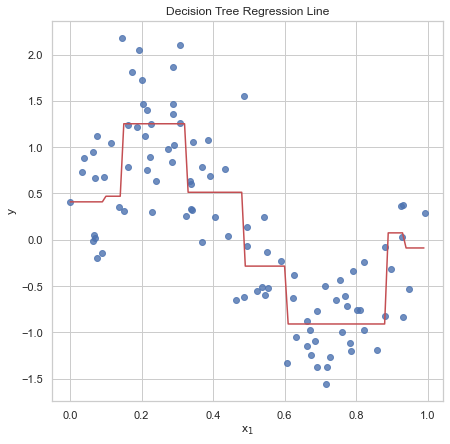

In [66]:
from decision_tree import RegressionDecisionTree, ClassificationDecisionTree

# generate data
m = 100
n = 1
X = np.random.rand(m,n)
y = np.sin(2*np.pi*X[:,0]) + np.random.normal(0,0.5,m)

# fit regression tree model
tree = RegressionDecisionTree(max_depth=4,min_samples_split=5)
tree.fit(X,y)

# plot regression line
X_sweep = np.arange(0,1,0.01).reshape(-1,1)
y_sweep = tree.predict(X_sweep)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],y,alpha=0.8)
plt.plot(X_sweep,y_sweep,color='r')
plt.xlabel("x$_1$")
plt.ylabel("y")
plt.title(f'Decision Tree Regression Line');
plt.savefig("figures/decreg")

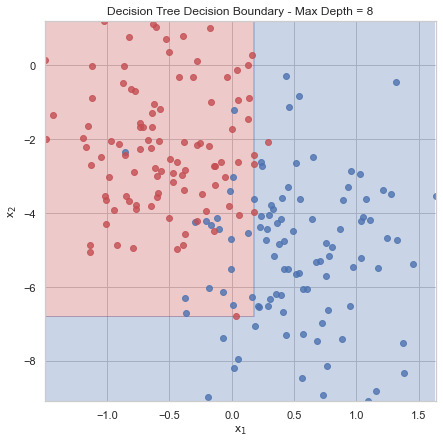

In [77]:
# generate data
m = 200
n = 2
X1 = np.concatenate([np.random.normal(-0.5,0.5,size=m//2),np.random.normal(0.5,0.5,size=m//2)],axis=0)
X2 = -np.concatenate([np.random.normal(2,2,size=m//2),np.random.normal(5,2,size=m//2)],axis=0)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1)],axis=1)
y = np.concatenate([np.ones(m//2),np.zeros(m//2)])

# fit classification tree model
max_depth = 8
tree = ClassificationDecisionTree(max_depth=max_depth)
tree.fit(X,y)

# plot decision boundary
plot_decision_boundary_2d(tree,X,y)
plt.title(f'Decision Tree Decision Boundary - Max Depth = {max_depth}')
plt.savefig('figures/decclass');

## Random Forest

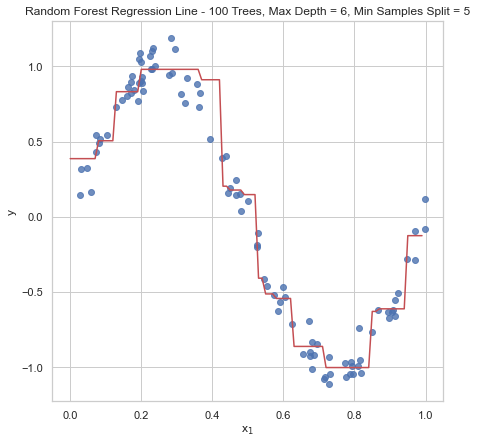

In [84]:
from random_forest import RandomForestClassification, RandomForestRegression

# generate data
m = 100
n = 1
X = np.random.rand(m,n)
y = np.sin(2*np.pi*X[:,0]) + np.random.normal(0,0.1,m)

# fit random forest model
max_depth = 6
n_trees = 100
min_samples_split = 5
forest = RandomForestRegression(n_trees=n_trees,max_depth=max_depth,min_samples_split=min_samples_split)
forest.fit(X,y)

# plot regression line
X_sweep = np.arange(0,1,0.01).reshape(-1,1)
y_sweep = forest.predict(X_sweep)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],y,alpha=0.8)
plt.plot(X_sweep,y_sweep,color='r')
plt.xlabel("x$_1$")
plt.ylabel("y")
plt.title(f'Random Forest Regression Line - {n_trees} Trees, Max Depth = {max_depth}, Min Samples Split = {min_samples_split}');
plt.savefig("figures/froestreg")

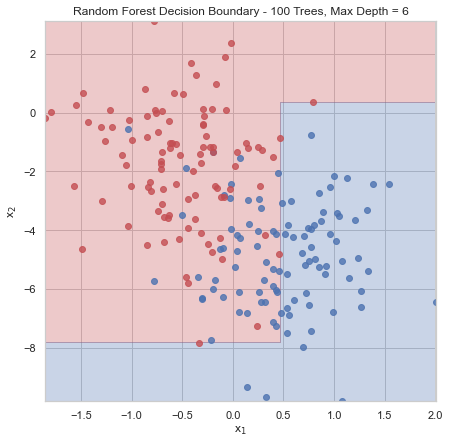

In [85]:
m = 200
n = 2
X1 = np.concatenate([np.random.normal(-0.5,0.5,size=m//2),np.random.normal(0.5,0.5,size=m//2)],axis=0)
X2 = -np.concatenate([np.random.normal(2,2,size=m//2),np.random.normal(5,2,size=m//2)],axis=0)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1)],axis=1)
y = np.concatenate([np.ones(m//2),np.zeros(m//2)])

max_depth = 6
n_trees = 100
forest = RandomForestClassification(n_trees=n_trees,max_depth=max_depth,max_features=2)
forest.fit(X,y)

plot_decision_boundary_2d(forest,X,y)
plt.title(f'Random Forest Decision Boundary - {n_trees} Trees, Max Depth = {max_depth}')
plt.savefig('figures/forestclass');

## Neural Networks

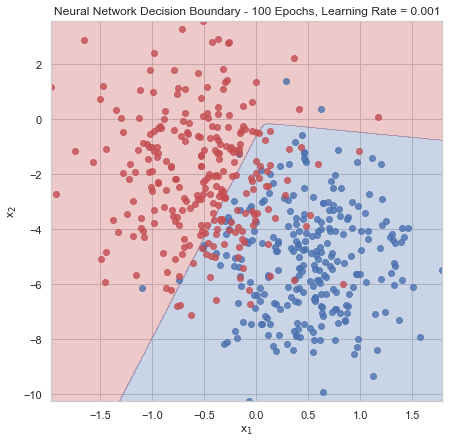

In [72]:
from neural_networks.neural_network import NeuralNetwork 
from neural_networks.losses import BinaryCrossEntropy 
from neural_networks.activations import ReLU, Sigmoid
from neural_networks.optimizers import SGD
from neural_networks.layers import FC

# generate data
m = 512
n = 2
X1 = np.concatenate([np.random.normal(-0.5,0.5,size=m//2),np.random.normal(0.5,0.5,size=m//2)],axis=0)
X2 = -np.concatenate([np.random.normal(2,2,size=m//2),np.random.normal(5,2,size=m//2)],axis=0)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1)],axis=1)
X = X.transpose()
y = np.concatenate([np.ones(m//2),np.zeros(m//2)])

# create network
network = NeuralNetwork(loss=BinaryCrossEntropy(),optimizer=SGD(batch_size=8))
network.add_layer(FC(100,ReLU()))
network.add_layer(FC(100,ReLU()))
network.add_layer(FC(100,ReLU()))
network.add_layer(FC(1,Sigmoid()))

# fit network
n_epochs= 100
lr = 1e-3
network.fit(X,y,n_epochs,lr)

plot_decision_boundary_2d(network,X,y,t=True)
plt.title(f'Neural Network Decision Boundary - {n_epochs} Epochs, Learning Rate = {lr}')
plt.savefig('figures/nnclass');